<a href="https://colab.research.google.com/github/pedrolustosab/AnaliseValorAgregado/blob/main/EVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

In [2]:
def date_range_monthly(start_date, n):
    dates = []
    current_date = start_date

    # Encontrar o último dia do mês da data inicial
    end_of_month = (current_date + relativedelta(day=1, months=1) - relativedelta(days=1))
    dates.append(end_of_month)

    for _ in range(n - 1):
        # Mover para o primeiro dia do próximo mês
        current_date = end_of_month + relativedelta(days=1)
        # Encontrar o último dia do próximo mês
        end_of_month = (current_date + relativedelta(day=1, months=1) - relativedelta(days=1))
        dates.append(end_of_month)

    return dates

In [3]:
# Exemplo de uso:
start_date = date(2023, 7, 1)
n = 18  # Número de datas desejadas
date_list = date_range_monthly(start_date, n)

In [4]:
# Criar um DataFrame com a coluna 'Medicao'
df = pd.DataFrame({'DataMedicao': date_list})
df

,DataMedicao
0,2023-07-31
1,2023-08-31
2,2023-09-30
3,2023-10-31
4,2023-11-30
5,2023-12-31
6,2024-01-31
7,2024-02-29
8,2024-03-31
9,2024-04-30


In [5]:
df.index.name = 'Medicao'
df.index += 1
df.reset_index(inplace=True)
df

,Medicao,DataMedicao
0,1,2023-07-31
1,2,2023-08-31
2,3,2023-09-30
3,4,2023-10-31
4,5,2023-11-30
5,6,2023-12-31
6,7,2024-01-31
7,8,2024-02-29
8,9,2024-03-31
9,10,2024-04-30


In [6]:
# Função para calcular a diferença em dias
def calculate_days(date_medicao):
    return (date_medicao - start_date).days + 1

# Adiciona a coluna 'Dia' usando apply
df['Dia'] = df['DataMedicao'].apply(calculate_days)
df

,Medicao,DataMedicao,Dia
0,1,2023-07-31,31
1,2,2023-08-31,62
2,3,2023-09-30,92
3,4,2023-10-31,123
4,5,2023-11-30,153
5,6,2023-12-31,184
6,7,2024-01-31,215
7,8,2024-02-29,244
8,9,2024-03-31,275
9,10,2024-04-30,305


In [7]:
# Parâmetros da função sigmoidal para ValorPlanejado
L_valor = 16899000       # Valor máximo da função
k_valor = 0.50          # Taxa de crescimento
x0_valor = 12          # Ponto de inflexão


# Calcula o ValorPlanejado usando a função sigmoidal
df['ValorPlanejado'] = L_valor / (1 + np.exp(-k_valor * (df['Medicao'] - x0_valor)))

# Arredonda para duas casas decimais
df['ValorPlanejado'] = df['ValorPlanejado'].round(2)
df

,Medicao,DataMedicao,Dia,ValorPlanejado
0,1,2023-07-31,31,68781.26
1,2,2023-08-31,62,113102.49
2,3,2023-09-30,92,185668.34
3,4,2023-10-31,123,303948.96
4,5,2023-11-30,153,495347.39
5,6,2023-12-31,184,801449.83
6,7,2024-01-31,215,1281927.38
7,8,2024-02-29,244,2014410.18
8,9,2024-03-31,275,3082808.93
9,10,2024-04-30,305,4544841.08


In [8]:
# Parâmetros da função sigmoidal para CustoReal
L_custo = 17009000      # Valor máximo da função
k_custo = 0.52        # Taxa de crescimento (um pouco maior)
x0_custo = 11        # Ponto de inflexão

# Calcula o CustoReal usando a função sigmoidal
df['CustoReal'] = L_custo / (1 + np.exp(-k_custo * (df['Medicao'] - x0_custo)))

# Arredonda para duas casas decimais
df['CustoReal'] = df['CustoReal'].round(2)

# Ajusta os valores para garantir que não extrapolem o intervalo
df.loc[df['Medicao'] > 13, ['CustoReal']] = np.nan
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal
0,1,2023-07-31,31,68781.26,93316.46
1,2,2023-08-31,62,113102.49,156375.73
2,3,2023-09-30,92,185668.34,261389.30
3,4,2023-10-31,123,303948.96,435103.63
4,5,2023-11-30,153,495347.39,719306.73
5,6,2023-12-31,184,801449.83,1175975.39
6,7,2024-01-31,215,1281927.38,1888950.94
7,8,2024-02-29,244,2014410.18,2953555.82
8,9,2024-03-31,275,3082808.93,4441900.25
9,10,2024-04-30,305,4544841.08,6341843.64


In [9]:
# Parâmetros da função sigmoidal para CustoReal
L_agre = 14999000       # Valor máximo da função
k_agre = 0.499         # Taxa de crescimento (um pouco maior)
x0_agre = 12.15         # Ponto de inflexão

# Calcula o CustoReal usando a função sigmoidal
df['ValorAgregado'] = L_agre / (1 + np.exp(-k_agre * (df['Medicao'] - x0_agre)))

# Arredonda para duas casas decimais
df['ValorAgregado'] = df['ValorAgregado'].round(2)

# Ajusta os valores para garantir que não extrapolem o intervalo
df.loc[df['Medicao'] > 13, ['ValorAgregado']] = np.nan
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal,ValorAgregado
0,1,2023-07-31,31,68781.26,93316.46,57286.34
1,2,2023-08-31,62,113102.49,156375.73,94122.19
2,3,2023-09-30,92,185668.34,261389.30,154399.21
3,4,2023-10-31,123,303948.96,435103.63,252624.10
4,5,2023-11-30,153,495347.39,719306.73,411604.57
5,6,2023-12-31,184,801449.83,1175975.39,666114.68
6,7,2024-01-31,215,1281927.38,1888950.94,1066492.06
7,8,2024-02-29,244,2014410.18,2953555.82,1679325.50
8,9,2024-03-31,275,3082808.93,4441900.25,2579120.34
9,10,2024-04-30,305,4544841.08,6341843.64,3822667.20


In [10]:
df['VariacoCusto'] = df['ValorAgregado'] - df['CustoReal']
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal,ValorAgregado,VariacoCusto
0,1,2023-07-31,31,68781.26,93316.46,57286.34,-36030.12
1,2,2023-08-31,62,113102.49,156375.73,94122.19,-62253.54
2,3,2023-09-30,92,185668.34,261389.30,154399.21,-106990.09
3,4,2023-10-31,123,303948.96,435103.63,252624.10,-182479.53
4,5,2023-11-30,153,495347.39,719306.73,411604.57,-307702.16
5,6,2023-12-31,184,801449.83,1175975.39,666114.68,-509860.71
6,7,2024-01-31,215,1281927.38,1888950.94,1066492.06,-822458.88
7,8,2024-02-29,244,2014410.18,2953555.82,1679325.50,-1274230.32
8,9,2024-03-31,275,3082808.93,4441900.25,2579120.34,-1862779.91
9,10,2024-04-30,305,4544841.08,6341843.64,3822667.20,-2519176.44


In [11]:
df['VariacaoPrazo'] = df['ValorAgregado'] - df['ValorPlanejado']
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal,ValorAgregado,VariacoCusto,VariacaoPrazo
0,1,2023-07-31,31,68781.26,93316.46,57286.34,-36030.12,-11494.92
1,2,2023-08-31,62,113102.49,156375.73,94122.19,-62253.54,-18980.30
2,3,2023-09-30,92,185668.34,261389.30,154399.21,-106990.09,-31269.13
3,4,2023-10-31,123,303948.96,435103.63,252624.10,-182479.53,-51324.86
4,5,2023-11-30,153,495347.39,719306.73,411604.57,-307702.16,-83742.82
5,6,2023-12-31,184,801449.83,1175975.39,666114.68,-509860.71,-135335.15
6,7,2024-01-31,215,1281927.38,1888950.94,1066492.06,-822458.88,-215435.32
7,8,2024-02-29,244,2014410.18,2953555.82,1679325.50,-1274230.32,-335084.68
8,9,2024-03-31,275,3082808.93,4441900.25,2579120.34,-1862779.91,-503688.59
9,10,2024-04-30,305,4544841.08,6341843.64,3822667.20,-2519176.44,-722173.88


In [12]:
ultimo_custo_real = df['CustoReal'].dropna().iloc[-1]
print(f"O último custo real é: {ultimo_custo_real}")
ultimo_valor_agregado = df['ValorAgregado'].dropna().iloc[-1]
print(f"O último valor agregado é: {ultimo_valor_agregado}")
valor_planejado = df['ValorPlanejado'].iloc[-1]
print(f"O valor planejado é: {valor_planejado}")
indice = df[df['ValorAgregado'] == ultimo_valor_agregado].index[0]
print(f"O índice do último valor agregado é: {indice}")
valor_planejado_indice = df.loc[indice, 'ValorPlanejado']
print(f"O valor planejado no índice é: {valor_planejado_indice}")
ultimo_data_real = df.loc[indice, 'DataMedicao']
print(f"A última data real é: {ultimo_data_real}")
ultimo_dia_real = df.loc[indice, 'Dia']
print(f"O último dia real é: {ultimo_dia_real}")
ultimo_dia_planejado = df['Dia'].iloc[-1]
print(f"O último dia planejado é: {ultimo_dia_planejado}")

O último custo real é: 12567099.75
O último valor agregado é: 9066533.73
O valor planejado é: 16097550.17
O índice do último valor agregado é: 12
O valor planejado no índice é: 10518940.24
A última data real é: 2024-07-31
O último dia real é: 397
O último dia planejado é: 550


In [13]:
IDC = (ultimo_valor_agregado / ultimo_custo_real).round(2)
print(f"O valor de IDC é: {IDC}")
IDP = (ultimo_valor_agregado / valor_planejado_indice).round(2)
print(f"O valor de IDP é: {IDP}")
EPT = ((valor_planejado - ultimo_valor_agregado) / IDC).round(2)
print(f"O valor de EPT é: {EPT}")
ENT = EPT + ultimo_custo_real
print(f"O valor de ENT é: {ENT}")
VNT = (ENT - valor_planejado).round(2)
print(f"O valor de VNT é: {VNT}")
DPT = math.ceil((ultimo_dia_planejado / IDP - ultimo_dia_real + 1))
print(f"O valor de DPT é: {DPT}")
DNT = math.ceil(ultimo_dia_planejado/IDP)
print(f"O valor de DNT é: {DNT}")
VD = DNT - ultimo_dia_planejado
print(f"O valor de VD é: {VD}")

O valor de IDC é: 0.72
O valor de IDP é: 0.86
O valor de EPT é: 9765300.61
O valor de ENT é: 22332400.36
O valor de VNT é: 6234850.19
O valor de DPT é: 244
O valor de DNT é: 640
O valor de VD é: 90


In [14]:
df['IDC'] = df['ValorAgregado'] / df['CustoReal']
df['IDP'] = df['ValorAgregado'] / df['ValorPlanejado']
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal,ValorAgregado,VariacoCusto,VariacaoPrazo,IDC,IDP
0,1,2023-07-31,31,68781.26,93316.46,57286.34,-36030.12,-11494.92,0.613893,0.832877
1,2,2023-08-31,62,113102.49,156375.73,94122.19,-62253.54,-18980.30,0.601898,0.832185
2,3,2023-09-30,92,185668.34,261389.30,154399.21,-106990.09,-31269.13,0.590687,0.831586
3,4,2023-10-31,123,303948.96,435103.63,252624.10,-182479.53,-51324.86,0.580607,0.831140
4,5,2023-11-30,153,495347.39,719306.73,411604.57,-307702.16,-83742.82,0.572224,0.830941
5,6,2023-12-31,184,801449.83,1175975.39,666114.68,-509860.71,-135335.15,0.566436,0.831137
6,7,2024-01-31,215,1281927.38,1888950.94,1066492.06,-822458.88,-215435.32,0.564595,0.831944
7,8,2024-02-29,244,2014410.18,2953555.82,1679325.50,-1274230.32,-335084.68,0.568578,0.833656
8,9,2024-03-31,275,3082808.93,4441900.25,2579120.34,-1862779.91,-503688.59,0.580634,0.836614
9,10,2024-04-30,305,4544841.08,6341843.64,3822667.20,-2519176.44,-722173.88,0.602769,0.841100


In [15]:
def estimar_data(Dia):
  if Dia >= ultimo_dia_real:
    intervalo_origem = ultimo_dia_planejado - ultimo_dia_real
    intervalo_destino = DNT - ultimo_dia_real
    DiaPlanejado = intervalo_destino * (Dia - ultimo_dia_real) / intervalo_origem + ultimo_dia_real
  else:
    DiaPlanejado = 0
  return math.ceil(DiaPlanejado)

def estimar_CR(valor_planejado_):
  if valor_planejado_ >= valor_planejado_indice:
    intervalo_origem = valor_planejado - valor_planejado_indice
    intervalo_destino = ENT - ultimo_custo_real
    CR_Estimado = (intervalo_destino * (valor_planejado_ - valor_planejado_indice) / intervalo_origem + ultimo_custo_real).round(2)
  else:
    CR_Estimado = 0
  return CR_Estimado

def estimar_VA(valor_planejado_):
  if valor_planejado_ >= valor_planejado_indice:
    intervalo_origem = valor_planejado - valor_planejado_indice
    intervalo_destino = valor_planejado - ultimo_valor_agregado
    VA_Estimado = (intervalo_destino * (valor_planejado_ - valor_planejado_indice) / intervalo_origem + ultimo_valor_agregado).round(2)
  else:
    VA_Estimado = 0
  return VA_Estimado

def calcular_data_estimada(row_index, DiaEstimado):
    if row_index > indice:
        return start_date + pd.to_timedelta(DiaEstimado, unit='D')
    elif row_index == indice:
        return ultimo_data_real
    else:
        return np.nan

In [16]:
df['DiaEstimado'] = df['Dia'].apply(estimar_data)
df['DataEstimada'] = [calcular_data_estimada(index, row['DiaEstimado']) for index, row in df.iterrows()]
df['CR_Estimado'] = df['ValorPlanejado'].apply(estimar_CR)
df['VA_Estimado'] = df['ValorPlanejado'].apply(estimar_VA)
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal,ValorAgregado,VariacoCusto,VariacaoPrazo,IDC,IDP,DiaEstimado,DataEstimada,CR_Estimado,VA_Estimado
0,1,2023-07-31,31,68781.26,93316.46,57286.34,-36030.12,-11494.92,0.613893,0.832877,0,NaN,0.00,0.00
1,2,2023-08-31,62,113102.49,156375.73,94122.19,-62253.54,-18980.30,0.601898,0.832185,0,NaN,0.00,0.00
2,3,2023-09-30,92,185668.34,261389.30,154399.21,-106990.09,-31269.13,0.590687,0.831586,0,NaN,0.00,0.00
3,4,2023-10-31,123,303948.96,435103.63,252624.10,-182479.53,-51324.86,0.580607,0.831140,0,NaN,0.00,0.00
4,5,2023-11-30,153,495347.39,719306.73,411604.57,-307702.16,-83742.82,0.572224,0.830941,0,NaN,0.00,0.00
5,6,2023-12-31,184,801449.83,1175975.39,666114.68,-509860.71,-135335.15,0.566436,0.831137,0,NaN,0.00,0.00
6,7,2024-01-31,215,1281927.38,1888950.94,1066492.06,-822458.88,-215435.32,0.564595,0.831944,0,NaN,0.00,0.00
7,8,2024-02-29,244,2014410.18,2953555.82,1679325.50,-1274230.32,-335084.68,0.568578,0.833656,0,NaN,0.00,0.00
8,9,2024-03-31,275,3082808.93,4441900.25,2579120.34,-1862779.91,-503688.59,0.580634,0.836614,0,NaN,0.00,0.00
9,10,2024-04-30,305,4544841.08,6341843.64,3822667.20,-2519176.44,-722173.88,0.602769,0.841100,0,NaN,0.00,0.00


In [17]:
def calcular_vp_simples(row_index, valor_planejado, valor_planejado_anterior):
    if row_index <= indice:
        return valor_planejado - valor_planejado_anterior
    else:
        return np.nan

df['VP_Simples'] = [calcular_vp_simples(index, row['ValorPlanejado'], df['ValorPlanejado'].shift(1)[index])
                   for index, row in df.iterrows()]
df.loc[0, 'VP_Simples'] = df.loc[0, 'ValorPlanejado']
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal,ValorAgregado,VariacoCusto,VariacaoPrazo,IDC,IDP,DiaEstimado,DataEstimada,CR_Estimado,VA_Estimado,VP_Simples
0,1,2023-07-31,31,68781.26,93316.46,57286.34,-36030.12,-11494.92,0.613893,0.832877,0,NaN,0.00,0.00,68781.26
1,2,2023-08-31,62,113102.49,156375.73,94122.19,-62253.54,-18980.30,0.601898,0.832185,0,NaN,0.00,0.00,44321.23
2,3,2023-09-30,92,185668.34,261389.30,154399.21,-106990.09,-31269.13,0.590687,0.831586,0,NaN,0.00,0.00,72565.85
3,4,2023-10-31,123,303948.96,435103.63,252624.10,-182479.53,-51324.86,0.580607,0.831140,0,NaN,0.00,0.00,118280.62
4,5,2023-11-30,153,495347.39,719306.73,411604.57,-307702.16,-83742.82,0.572224,0.830941,0,NaN,0.00,0.00,191398.43
5,6,2023-12-31,184,801449.83,1175975.39,666114.68,-509860.71,-135335.15,0.566436,0.831137,0,NaN,0.00,0.00,306102.44
6,7,2024-01-31,215,1281927.38,1888950.94,1066492.06,-822458.88,-215435.32,0.564595,0.831944,0,NaN,0.00,0.00,480477.55
7,8,2024-02-29,244,2014410.18,2953555.82,1679325.50,-1274230.32,-335084.68,0.568578,0.833656,0,NaN,0.00,0.00,732482.80
8,9,2024-03-31,275,3082808.93,4441900.25,2579120.34,-1862779.91,-503688.59,0.580634,0.836614,0,NaN,0.00,0.00,1068398.75
9,10,2024-04-30,305,4544841.08,6341843.64,3822667.20,-2519176.44,-722173.88,0.602769,0.841100,0,NaN,0.00,0.00,1462032.15


In [18]:
df.loc[indice - 1, 'Dia']

366

In [19]:
ultimo_VP_Simples = df['VP_Simples'].dropna().iloc[-1]
penultimo_VP_Simples = df['VP_Simples'].dropna().iloc[-2]
acum_VP_Simples = df['VP_Simples'].sum() - ultimo_VP_Simples
VariacaoPrazo = (ultimo_VP_Simples + (acum_VP_Simples - ultimo_valor_agregado)).round(2)
VariacaoTempo = math.floor(((acum_VP_Simples - ultimo_valor_agregado)/penultimo_VP_Simples*(df.loc[indice - 1, 'Dia'] - df.loc[indice - 2, 'Dia'])) + (df.loc[indice, 'Dia'] - df.loc[indice - 1, 'Dia'])+0.5)
print(f"O valor de VariacaoPrazo é: {VariacaoPrazo}")
print(f"O valor de VariacaoTempo é: {VariacaoTempo}")

O valor de VariacaoPrazo é: 1452406.51
O valor de VariacaoTempo é: 22


In [20]:
df = df.drop(columns=['VP_Simples'])
df

,Medicao,DataMedicao,Dia,ValorPlanejado,CustoReal,ValorAgregado,VariacoCusto,VariacaoPrazo,IDC,IDP,DiaEstimado,DataEstimada,CR_Estimado,VA_Estimado
0,1,2023-07-31,31,68781.26,93316.46,57286.34,-36030.12,-11494.92,0.613893,0.832877,0,NaN,0.00,0.00
1,2,2023-08-31,62,113102.49,156375.73,94122.19,-62253.54,-18980.30,0.601898,0.832185,0,NaN,0.00,0.00
2,3,2023-09-30,92,185668.34,261389.30,154399.21,-106990.09,-31269.13,0.590687,0.831586,0,NaN,0.00,0.00
3,4,2023-10-31,123,303948.96,435103.63,252624.10,-182479.53,-51324.86,0.580607,0.831140,0,NaN,0.00,0.00
4,5,2023-11-30,153,495347.39,719306.73,411604.57,-307702.16,-83742.82,0.572224,0.830941,0,NaN,0.00,0.00
5,6,2023-12-31,184,801449.83,1175975.39,666114.68,-509860.71,-135335.15,0.566436,0.831137,0,NaN,0.00,0.00
6,7,2024-01-31,215,1281927.38,1888950.94,1066492.06,-822458.88,-215435.32,0.564595,0.831944,0,NaN,0.00,0.00
7,8,2024-02-29,244,2014410.18,2953555.82,1679325.50,-1274230.32,-335084.68,0.568578,0.833656,0,NaN,0.00,0.00
8,9,2024-03-31,275,3082808.93,4441900.25,2579120.34,-1862779.91,-503688.59,0.580634,0.836614,0,NaN,0.00,0.00
9,10,2024-04-30,305,4544841.08,6341843.64,3822667.20,-2519176.44,-722173.88,0.602769,0.841100,0,NaN,0.00,0.00


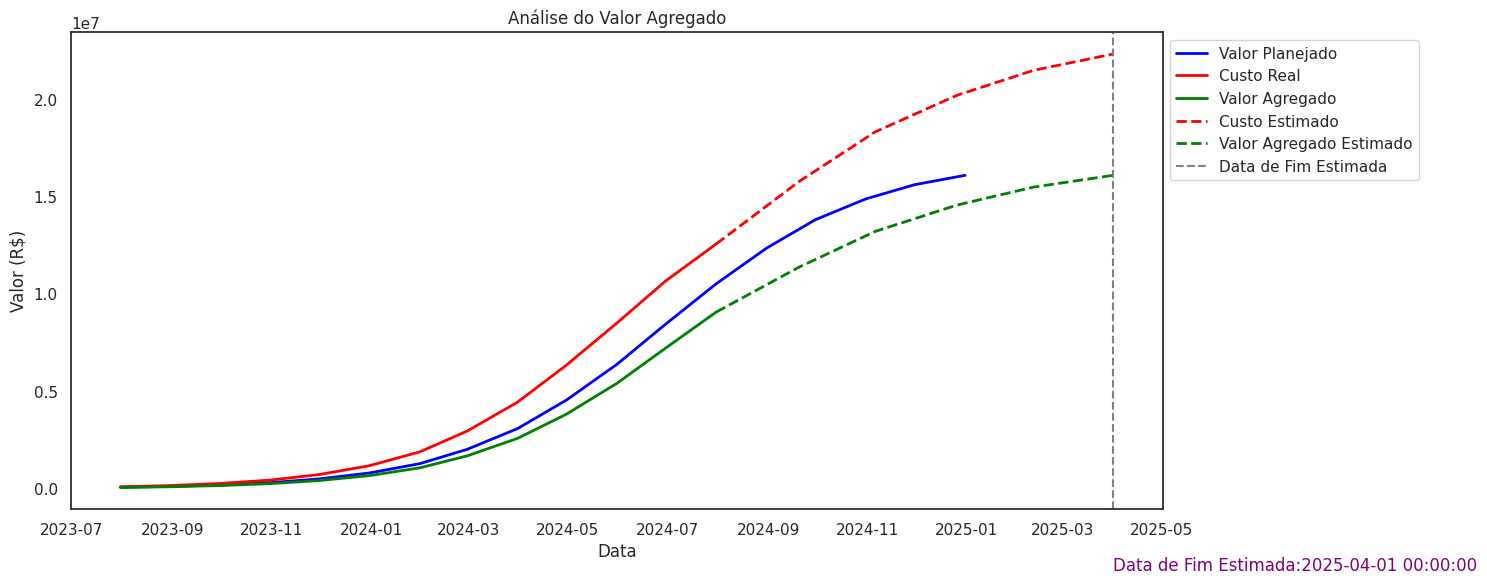

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do gráfico com Seaborn
sns.set(style="white")

# Inicializando a figura
plt.figure(figsize=(15, 6))

# Filtros para os dados reais e planejados
df_filtered = df.dropna(subset=['ValorPlanejado', 'CustoReal', 'ValorAgregado'])
df_filtered = df_filtered[df_filtered['DataMedicao'].notna()]

# Plotando as linhas para os dados reais e planejados usando Seaborn
sns.lineplot(x='DataMedicao', y='ValorPlanejado', data=df, label='Valor Planejado', color='blue', linewidth=2)
sns.lineplot(x='DataMedicao', y='CustoReal', data=df_filtered, label='Custo Real', color='red', linewidth=2)
sns.lineplot(x='DataMedicao', y='ValorAgregado', data=df_filtered, label='Valor Agregado', color='green', linewidth=2)

# Filtros para os dados estimados
df_estimado_filtered = df.dropna(subset=['DataEstimada', 'CR_Estimado', 'VA_Estimado'])
df_estimado_filtered = df_estimado_filtered[df_estimado_filtered['CR_Estimado'] > 0]
df_estimado_filtered = df_estimado_filtered[df_estimado_filtered['VA_Estimado'] > 0]

# Plotando as linhas para os dados estimados usando Seaborn
sns.lineplot(x='DataEstimada', y='CR_Estimado', data=df_estimado_filtered, label='Custo Estimado', linestyle='--', color='red', linewidth=2)
sns.lineplot(x='DataEstimada', y='VA_Estimado', data=df_estimado_filtered, label='Valor Agregado Estimado', linestyle='--', color='green', linewidth=2)

# Adicionando uma linha vertical para a Data de Fim Estimado
data_fim_estimada = pd.Timestamp(df['DataEstimada'].dropna().iloc[-1])  # Substitua pela data de fim estimada desejada
plt.axvline(x=data_fim_estimada, color='gray', linestyle='--', linewidth=1.5, label='Data de Fim Estimada')
# Adicionando um rótulo de texto para a linha vertical
plt.text(data_fim_estimada, plt.ylim()[1] * -0.15, f'Data de Fim Estimada:{data_fim_estimada}', color='purple',
verticalalignment='top', horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))


# Customizando os eixos e rótulos
plt.xlabel('Data')
plt.ylabel('Valor (R$)')
plt.title('Análise do Valor Agregado')
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()


